In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [2]:
!pip install pycaret==2.3.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 kB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 117.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 

In [3]:
# check version
from pycaret.utils import version
version()

'2.3.10'

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv(
    'https://github.com/jads-nl/discover-projects/blob/main/ames-housing/AmesHousing.csv'+'?raw=True'
    )

In [5]:
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
data.shape

(2930, 82)

In [7]:
data1 = data.sample(frac=0.9, random_state=786)
data1_unseen = data.drop(data.index)

data1.reset_index(drop=True, inplace=True)
data1_unseen.reset_index(drop=True, inplace=True)

print('Data1 for Modeling: ' + str(data1.shape))
print('Unseen Data1 For Predictions: ' + str(data1_unseen.shape))

Data1 for Modeling: (2637, 82)
Unseen Data1 For Predictions: (0, 82)


Data preparation

In [9]:
from pycaret.regression import *
import pycaret.internal.tabular
import pycaret.containers.models.clustering
import pycaret.containers.models.anomaly
import pycaret.internal.preprocess
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import KBinsDiscretizer
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.pca import PCA as PCA_od
from scipy.stats import pearsonr
from sklearn.utils.validation import check_array
from pyod.models.iforest import IForest
from pyod.models.pca import PCA as PCA_od
from scipy.stats import pearsonr
from sklearn.utils.validation import check_array

s = setup(data1, target = 'SalePrice', session_id = 123, silent=True)

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(2637, 82)"
3,Missing Values,True
4,Numeric Features,24
5,Categorical Features,57
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1845, 386)"


In [10]:
# check transformed X_train
get_config('X_train')

,Order,PID,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1606,2041.0,903475072.0,69.267937,12358.0,1941.0,1950.0,0.00000,360.0,0.0,360.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1695,1325.0,902406080.0,81.000000,12150.0,1954.0,1954.0,335.00000,0.0,0.0,1050.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2122,1207.0,534277056.0,69.267937,8475.0,1956.0,1956.0,0.00000,228.0,0.0,724.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1479,1918.0,535151104.0,65.000000,6860.0,1956.0,1956.0,54.00000,908.0,0.0,100.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
678,2824.0,908130048.0,75.000000,8050.0,2002.0,2002.0,106.14418,475.0,297.0,142.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1414.0,905476096.0,50.000000,8405.0,1900.0,1950.0,0.00000,241.0,391.0,229.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2154,2058.0,905104256.0,70.000000,8425.0,1971.0,1990.0,0.00000,748.0,0.0,20.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1766,2884.0,911370432.0,41.000000,5748.0,2005.0,2006.0,473.00000,1573.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1122,220.0,905103040.0,69.267937,11341.0,1957.0,1996.0,180.00000,1302.0,0.0,90.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# list columns of transformed X_train 
get_config('X_train').columns

Index(['Order', 'PID', 'Lot Frontage', 'Lot Area', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD ',
       'Sale Condition_Abnorml', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=386)

Model Training & Selection

In [12]:
# train all models using default hyperparameters
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15786.1413,621444929.1448,24602.1656,0.8970,0.1358,0.0957,1.4160
lightgbm,Light Gradient Boosting Machine,15311.7464,653402539.5999,24999.1155,0.8930,0.1282,0.0894,5.6960
et,Extra Trees Regressor,17027.9047,701053494.7204,26090.4307,0.8852,0.1441,0.1036,5.2470
rf,Random Forest Regressor,16709.5709,737186643.8414,26743.7995,0.8797,0.1428,0.1005,4.3220
omp,Orthogonal Matching Pursuit,15563.1002,801292709.0621,26241.6831,0.8691,0.1375,0.0937,0.2050
br,Bayesian Ridge,15678.6350,798238562.6955,26849.4532,0.8688,0.1541,0.0945,2.7580
lasso,Lasso Regression,16040.6687,814223918.7034,26639.6885,0.8666,0.1471,0.0992,3.9750
en,Elastic Net,20245.8017,1145761927.6228,32898.9985,0.8121,0.1694,0.1218,5.7530
ada,AdaBoost Regressor,25016.1881,1146387727.4413,33756.5488,0.8107,0.2047,0.1683,0.7740
ridge,Ridge Regression,24174.6424,1449786302.5716,37433.9232,0.7623,0.2024,0.1449,1.0190


In [13]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [14]:
type(best)

sklearn.ensemble._gb.GradientBoostingRegressor

Create Model

In [ ]:
# train individual model
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24897.1122,1484359837.9707,38527.3907,0.7773,0.1951,0.1333
1,26303.7854,1445547665.6293,38020.3586,0.7578,0.2002,0.1485
2,26050.8000,1306212155.5220,36141.5572,0.8377,0.2435,0.1514
3,25764.0537,1312009146.8634,36221.6668,0.7773,0.2278,0.1514
4,29431.4146,2102950769.5024,45857.9412,0.6055,0.2343,0.1697
5,24352.9951,1456142813.7073,38159.4394,0.7558,0.2200,0.1429
6,27030.2098,2352036782.8537,48497.8018,0.5488,0.2214,0.1586
7,26420.0341,1578954336.8634,39736.0584,0.8158,0.2806,0.2124
8,28755.7415,2213686706.4927,47049.8322,0.7245,0.2215,0.1631


In [ ]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


Tune Hyperparameters

In [ ]:
%%time
# tune hyperparameters of model
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23468.5028,1226228245.8237,35017.5420,0.8160,0.1819,0.1290
1,24701.0681,1171668951.9657,34229.6502,0.8037,0.1819,0.1423
2,24887.7042,1157180174.0305,34017.3511,0.8562,0.1781,0.1407
3,24414.5104,1223912631.8438,34984.4627,0.7922,0.1984,0.1456
4,27562.0177,1898924669.0429,43576.6528,0.6437,0.2399,0.1598
5,23537.6798,1271484782.4432,35657.8853,0.7868,0.2051,0.1366
6,24116.9978,1470734382.3264,38350.1549,0.7179,0.1907,0.1381
7,23690.7057,1405914333.5462,37495.5242,0.8359,0.2575,0.1908
8,24748.1282,1512561779.8044,38891.6672,0.8117,0.2071,0.1493


CPU times: user 893 ms, sys: 36.1 ms, total: 929 ms
Wall time: 15.5 s


In [ ]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


Ensemble Model

In [ ]:

bagged_tunned_dt = ensemble_model(tuned_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16713.7449,583206881.2490,24149.6766,0.9125,0.1244,0.0938
1,16596.4590,640729724.4759,25312.6396,0.8926,0.1422,0.0993
2,21860.7047,1216957474.8196,34884.9176,0.8488,0.1744,0.1272
3,19590.4793,1397045923.5086,37377.0775,0.7628,0.1656,0.1177
4,16909.6586,669268122.0469,25870.2169,0.8744,0.1362,0.1006
5,18643.4629,808851240.1118,28440.3101,0.8644,0.1778,0.1187
6,19619.7821,1527540183.2315,39083.7586,0.7070,0.1777,0.1190
7,20204.2580,1274547157.0466,35700.8005,0.8513,0.2234,0.1549
8,20248.5078,1060770959.0831,32569.4790,0.8680,0.1773,0.1285


In [ ]:
print(bagged_tunned_dt)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='friedman_mse',
                                                      max_depth=10,
                                                      max_features=1.0,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.01,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=2,
                                                      min_samples_split=9,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=123,
                                                      splitter='best'),
                 boots

In [ ]:
type(bagged_tunned_dt)

sklearn.ensemble._bagging.BaggingRegressor

Voting Ensemble

In [ ]:
blender = blend_models([tuned_dt, bagged_tunned_dt])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17956.3744,740704427.4364,27215.8856,0.8889,0.1370,0.0991
1,18171.3585,731699547.0582,27049.9454,0.8774,0.1496,0.1082
2,21404.8998,1031265635.6572,32113.3249,0.8719,0.1611,0.1219
3,20147.3716,1051048320.7346,32419.8754,0.8216,0.1653,0.1187
4,21254.4850,1041666532.7791,32274.8591,0.8046,0.1668,0.1243
5,19118.9734,878376636.6098,29637.4195,0.8527,0.1708,0.1142
6,20204.2018,1286264466.7718,35864.5294,0.7532,0.1730,0.1198
7,20837.4788,1197747879.7642,34608.4943,0.8602,0.2325,0.1654
8,20505.0406,1091847654.3189,33043.1181,0.8641,0.1798,0.1283


In [ ]:
print(blender)

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='friedman_mse',
                                                   max_depth=10,
                                                   max_features=1.0,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.01,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=9,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=123,
                                                   splitter='best')),
                         

In [ ]:
type(blender)

sklearn.ensemble._voting.VotingRegressor

Stacking Ensemble

In [ ]:

stacker = stack_models([tuned_dt, bagged_tunned_dt])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14628.8442,475785187.6996,21812.5007,0.9286,0.1154,0.0828
1,14896.4935,533083565.2060,23088.6025,0.9107,0.1460,0.0920
2,18944.4653,1115134413.0577,33393.6283,0.8615,0.3146,0.1168
3,17972.1096,1912077835.1973,43727.3122,0.6754,0.1883,0.1081
4,15369.9101,500106049.6090,22363.0510,0.9062,0.1956,0.0924
5,17669.8551,651732080.3906,25529.0439,0.8907,0.1745,0.1143
6,17519.5418,1820234985.4432,42664.2120,0.6508,0.2009,0.1092
7,16368.4640,744983949.9117,27294.3941,0.9131,0.1980,0.1233
8,18620.4972,2518161054.5002,50181.2819,0.6866,0.1741,0.1141


In [ ]:
print(stacker)

StackingRegressor(cv=5,
                  estimators=[('dt',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='friedman_mse',
                                                     max_depth=10,
                                                     max_features=1.0,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.01,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=9,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                             

Analyze Model

In [ ]:
evaluate_model(best)

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


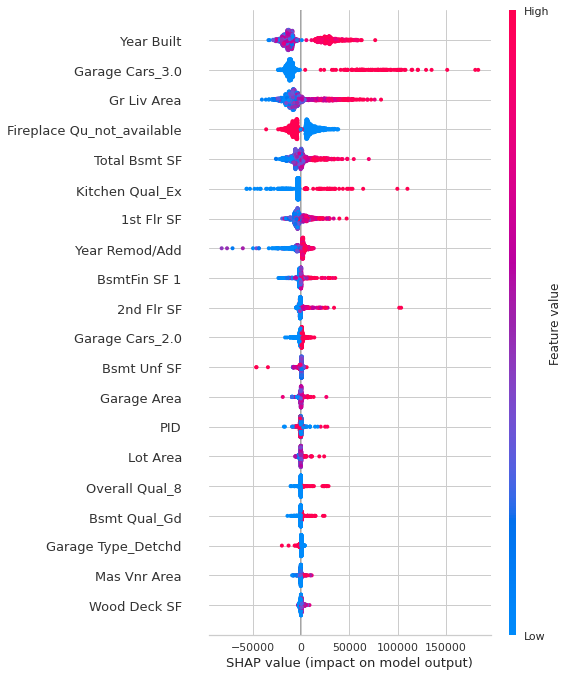

In [ ]:
import shap
interpret_model(tuned_dt)

In [ ]:
interpret_model(tuned_dt, plot = 'reason', observation = 105)

In [ ]:
!pip install interpret==0.2.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.6/756.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 KB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 55.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 KB 23.8 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
from interpret.blackbox import PartialDependence
import plotly.io as pio
interpret_model(tuned_dt, plot = 'pdp', feature = 'Year Built')


In [ ]:
interpret_model(tuned_dt, plot = 'msa')

Model Predictions

In [ ]:
# predict on holdout / test set
pred_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15047.7540,501097546.5171,22385.2082,0.9163,0.1213,0.0907


In [ ]:
pred_holdout.head()

,PID,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalePrice,Label
0,535375040.0,60.000000,10410.0,1916.0,1987.0,0.0,0.0,0.0,660.0,660.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,135000,118247.338674
1,535325280.0,60.000000,10434.0,1955.0,1955.0,0.0,0.0,0.0,1005.0,1005.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,115000,122662.046786
2,531453024.0,81.000000,9672.0,1984.0,1985.0,0.0,338.0,0.0,702.0,1040.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,152000,142664.775635
3,535181024.0,69.342102,12155.0,1970.0,1970.0,0.0,1237.0,0.0,420.0,1657.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,163500,179846.545707
4,903450048.0,69.342102,7758.0,1931.0,1950.0,600.0,224.0,0.0,816.0,1040.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,169500,161419.435504


In [ ]:
# predict on new data
data2 = data.copy()
data2.drop('SalePrice', axis=1, inplace=True)
data2.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [ ]:
# finalize model
best_final = finalize_model(best)

In [ ]:
# predict on data2
predictions = predict_model(best_final, data=data2)
predictions.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Label
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,204602.192665
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,119581.464540
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,166821.664820
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,262912.443736
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,184765.174876


 Save / Load / Deploy Model

In [ ]:
save_model(best_final, 'ameshousing_pycaret-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=['Order'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_de

In [ ]:
loaded_pipeline = load_model('ameshousing_pycaret-pipeline')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
print(loaded_pipeline)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=['Order'],
                                      ml_usecase='regression',
                                      numerical_features=[], target='SalePrice',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
     

In [ ]:
# visualize pipeline
from sklearn import set_config
set_config(display = 'diagram')

In [ ]:
loaded_pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=['Order'],
                                      ml_usecase='regression',
                                      numerical_features=[], target='SalePrice',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='deprecated',
                                           random_state=123, subsample=1.0,
                                           tol=0.0001, validation_fraction=0.1,
                                           verbose=0, warm_start=False)]],
         verbose=False)

THE END

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4233b43-95f3-4f57-89c1-82235fb37f28' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>